# 6.5. Unsupervised ML Clustering - World Real Estate Transactions

## Content:

#### 01. Importing Libraries and Data and Renaming Columns
#### 02. The Elbow-Technique
#### 03. k-means Clustering

### 01. Importing Libraries and Data and Renaming Columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# folder path to main project folder
path = r'C:\Users\ThinkPad T570\Documents\05-2024 OpenData WorldRealEstate Analysis_LazerHF'

In [4]:
# importing prepared World Real Estate dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_clean.csv'))

In [5]:
df.shape

(15794, 14)

In [7]:
df.head()

,Unnamed: 0,Title,Country,Location,Year,Total_Floors,Apart_Floors,Apart_Rooms,Total_Area,Price,Continent,C-Code,Price_category,Time_Period
0,1,"4 room apartment 245 m² in Yesiloez, Turkey",Turkey,"Yesiloez, Mediterranean Region, Alanya, Turkey",2007,2,3,5,245,274415.0,Europe,5,Middle price,2000-2010
1,4,"2 room apartment 54 m² in Prague, Czech Republic",Czech Republic,"Prague, Czech Republic",2023,4,2,4,54,314990.0,Europe,5,Middle price,2010on
2,6,"3 room apartment 72 m² in Minsk, Belarus",Belarus,"Minsk, Belarus",1955,4,4,3,72,122000.0,Europe,5,Middle price,1950-2000
3,7,"3 room apartment 100 m² in Minsk, Belarus",Belarus,"Minsk, Belarus",2013,16,2,3,100,159000.0,Europe,5,Middle price,2010on
4,16,"1 room apartment 55 m² in Akarca, Turkey",Turkey,"Akarca, Central Anatolia Region, Turkey",2021,6,2,2,55,314122.0,Europe,5,Middle price,2010on


In [8]:
df.columns

Index(['Unnamed: 0', 'Title', 'Country', 'Location', 'Year', 'Total_Floors',
       'Apart_Floors', 'Apart_Rooms', 'Total_Area', 'Price', 'Continent',
       'C-Code', 'Price_category', 'Time_Period'],
      dtype='object')

In [9]:
# drop column
df_numeric = df.drop(['Unnamed: 0', 'Title', 'Country', 'Location', 'Continent',
     'Price_category', 'Time_Period'], axis=1)

In [10]:
df_numeric.head()

,Year,Total_Floors,Apart_Floors,Apart_Rooms,Total_Area,Price,C-Code
0,2007,2,3,5,245,274415.0,5
1,2023,4,2,4,54,314990.0,5
2,1955,4,4,3,72,122000.0,5
3,2013,16,2,3,100,159000.0,5
4,2021,6,2,2,55,314122.0,5


### 02. The Elbow-Technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

[-584959685057967.8,
 -331176923291006.4,
 -168638613317556.94,
 -102707570149177.19,
 -73672667888181.3,
 -50653586971399.98,
 -35237884032112.22,
 -27595677853633.39,
 -22746262652021.996]

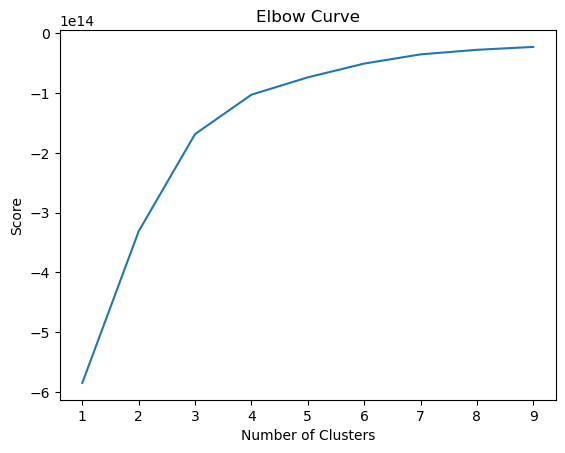

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  The Elbow Curve shows a heavy surge up to three, while there is a less intense but still strong increase to four on the x-axis, before the curve losses the boost and straightens almost out after 5 to 6 clusters.This means that the optimal count for the clusters is four.

### 03. k-means Clustering

In [34]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [35]:
# Fit the k-means object to the data.

kmeans.fit(df_numeric_sub)

C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [36]:
df_numeric_sub['clusters'] = kmeans.fit_predict(df_numeric_sub)

C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_4952\1057641657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric_sub['clusters'] = kmeans.fit_predict(df_numeric_sub)


In [37]:
df_numeric_sub.head()

,Year,Total_Floors,Apart_Floors,Apart_Rooms,Total_Area,Price,C-Code,clusters
0,2007,2,3,5,245,274415.0,5,2
1,2023,4,2,4,54,314990.0,5,2
2,1955,4,4,3,72,122000.0,5,0
3,2013,16,2,3,100,159000.0,5,0
4,2021,6,2,2,55,314122.0,5,2


In [38]:
df_numeric_sub['clusters'].value_counts()

clusters
1    9914
0    4074
2    1391
3     326
Name: count, dtype: int64

In [21]:
df_numeric['Total_Area'].max() # Check the maximal building total area

135000

In [22]:
df_numeric['Price'].max() # Check the maximal Price per Unit

7294649.0

#### NOTE: due to outliers I decided to create a subset to the dataframe to get a better visual understanding of the clustering below

In [31]:
# create a df_numeric subset with house prices under 1mio USD and total building area under 3000m2
df_numeric_sub = df_numeric[(df_numeric['Price'] < 1000000) & (df_numeric['Total_Area'] < 3000)] 

In [39]:
df_numeric_sub.shape

(15705, 8)

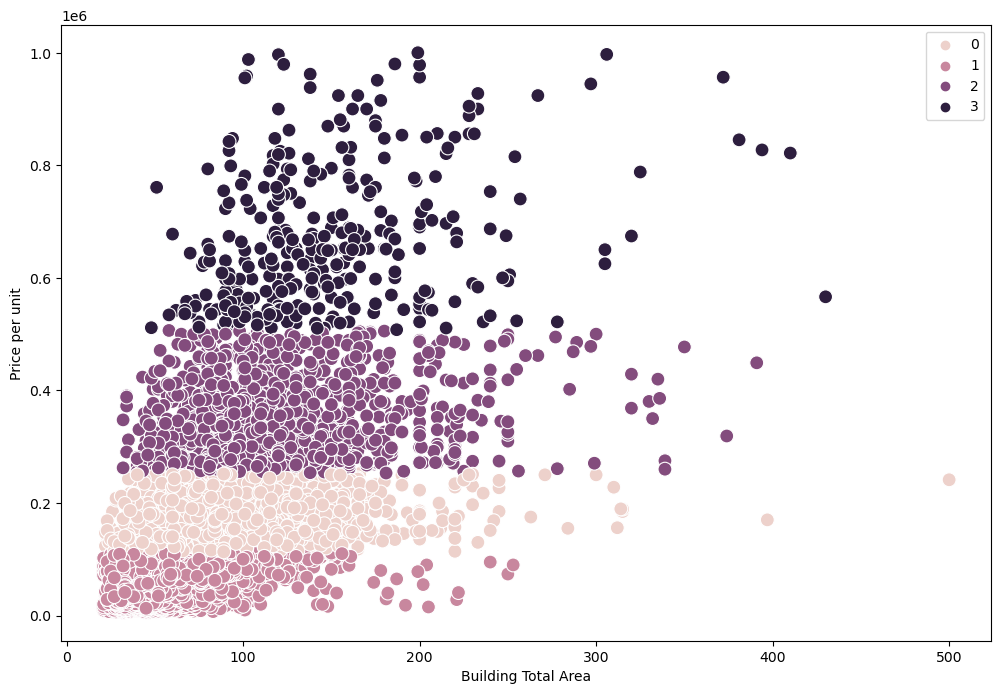

In [40]:
# Plot the clusters for the "Price" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric_sub['Total_Area'], y=df_numeric_sub['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Building Total Area') # Label x-axis.
plt.ylabel('Price per unit') # Label y-axis.
plt.show()

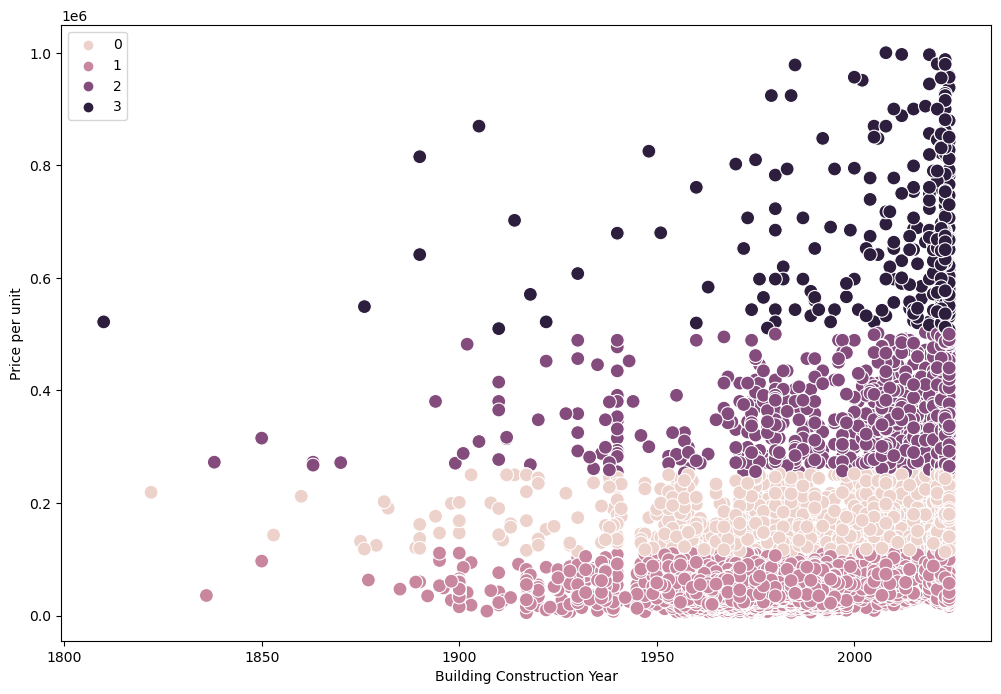

In [41]:
# Plot the clusters for the "Construction Building Year" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric_sub['Year'], y=df_numeric_sub['Price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Building Construction Year') 
plt.ylabel('Price per unit') 
plt.show()

In [46]:
df_numeric_sub.loc[df_numeric_sub['clusters'] == 3, 'cluster'] = 'black'
df_numeric_sub.loc[df_numeric_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_numeric_sub.loc[df_numeric_sub['clusters'] == 1, 'cluster'] = 'purple'
df_numeric_sub.loc[df_numeric_sub['clusters'] == 0, 'cluster'] = 'pink'

In [47]:
df_numeric_sub.groupby('cluster').agg({'Year':['mean', 'median'], 
                         'Total_Floors':['mean', 'median'], 
                         'Apart_Floors':['mean', 'median'],
                          'Apart_Rooms':['mean', 'median'],
                         'Total_Area':['mean', 'median'],
                         'Price':['mean', 'median']})

Year         Total_Floors        Apart_Floors         \
                    mean  median         mean median         mean median   
cluster                                                                    
black        2010.533742  2022.0     8.125767    5.0     6.073620    3.0   
dark purple  2009.700935  2021.0     7.008627    5.0     4.819554    3.0   
pink         2012.317378  2022.0     9.490673    9.0     5.547128    4.0   
purple       2000.515130  2012.0    11.036111    9.0     5.949768    4.0   

            Apart_Rooms         Total_Area                 Price            
                   mean median        mean median           mean    median  
cluster                                                                     
black          3.644172    4.0  150.653374  139.0  673858.693252  650000.0  
dark purple    3.337886    3.0  116.028756  106.0  340949.174694  325596.0  
pink           2.678940    3.0   78.573883   70.0  164508.770250  158963.5  
purple         2.107424    2.0   54.093807   52.0   60577.598648   60000.0

### Interpretation:
The K-means clustering visualization reveals four distinct clusters within our global real estate transactions dataset.

 - Cluster 0 could represent older properties with lower prices resp. newer  buildings with a smaller net dwelling area. This is supplemented by the data points in the regression analysis, which indicated higher prices for older buildings (up to the mid-1950s). Factors influencing this cluster might include architectural significance, location, or historical value.
 - Cluster 1 might represent newer properties with lower prices. These could be buildings that are modern but lack unique features or advantageous locations.
 - Cluster 2 may represent older properties with higher prices. These could be buildings of historical value or with architectural significance that command higher prices despite their age.
 - Cluster 3 likely represents newer, more expensive properties. These buildings command higher prices due to modern amenities, architectural designs, or desirable locations.

These clusters highlight the complexity and multi-faceted nature of real estate pricing, where price is influenced by numerous factors beyond just the building construction year; specifically the size, location and apartment features.

The results of the K-means clustering can be useful in future steps of an analytics pipeline in several ways:

1. Understanding these clusters can help us construct more sophisticated predictive models that capture the non-linear relationships and interactions between multiple variables.
2. They can be used to develop personalized development strategies for different segments of the real estate market.
3. The clusters can also be useful in identifying potential investment opportunities in the real estate market, as they can provide insights into what types of properties command higher prices and why.